### Binary Model

In [1]:
import pickle
import numpy as np
import h5py

In [2]:
from tensorflow.keras.models import load_model

In [3]:
from sklearn.metrics import classification_report

In [4]:
from sklearn.metrics import confusion_matrix

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
bin_model = load_model("bin_model.h5",compile=False)

In [7]:
bin_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Model)                (None, 18432)             14714688  
_________________________________________________________________
dense (Dense)                (None, 512)               9437696   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 24,415,553
Trainable params: 22,680,065
Non-trainable params: 1,735,488
____________________________________

In [8]:
X_test = pickle.load(open("X_test","rb"))

In [9]:
y_test = pickle.load(open("y_test","rb"))

In [10]:
len(X_test)

200

In [11]:
len(y_test)

200

In [12]:
print(y_test[:15])

[0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0]


In [13]:
def output(prediction):
    var=prediction[0][0]
    if var < 0.30:
        return 0
    else:
        return 1

In [14]:
y_pred = list()

In [15]:
def Prediction():
    for index in range(len(X_test)):
        new_array = X_test[index]
        image = np.expand_dims(new_array, axis=0)
        prediction = bin_model.predict([image])
        result = output(prediction)
        y_pred.append(result)
        

In [16]:
Prediction()

In [17]:
print(classification_report(y_test,y_pred,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88        96
           1       0.92      0.83      0.87       104

   micro avg       0.88      0.88      0.88       200
   macro avg       0.88      0.88      0.87       200
weighted avg       0.88      0.88      0.87       200



In [18]:
print(confusion_matrix(y_test,y_pred))

[[89  7]
 [18 86]]


In [19]:
cm = confusion_matrix(y_test,y_pred)

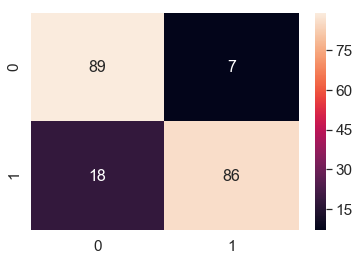

In [20]:
sns.set(font_scale=1.4) # for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 16})

In [21]:
Sensivity = 89/(89+7)

In [22]:
print(Sensivity)

0.9270833333333334


In [23]:
Specifity = 86/(86+18)

In [24]:
print(Specifity)

0.8269230769230769


In [25]:
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity)

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

Sensitivity :  0.9270833333333334
Specificity :  0.8269230769230769


In [26]:
from sklearn.metrics import roc_curve, auc

In [27]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_pred)

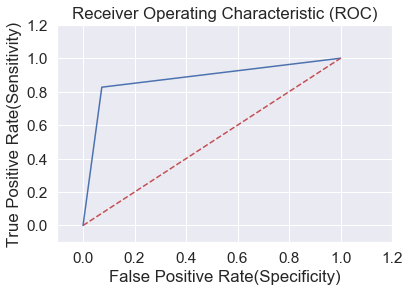

In [28]:
plt.title("Receiver Operating Characteristic (ROC)")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()

### Multi-Model

In [30]:
multi_model = load_model("multi_model.h5",compile=False)

In [31]:
multi_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Model)                (None, 18432)             14714688  
_________________________________________________________________
dense (Dense)                (None, 512)               9437696   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 1539      
Total params: 24,416,579
Trainable params: 22,681,091
Non-trainable params: 1,735,488
____________________________________

In [32]:
X_test_multi = pickle.load(open("X_test_multi","rb"))

In [33]:
y_test_multi = pickle.load(open("y_test_multi","rb"))

In [34]:
len(X_test_multi)

400

In [35]:
len(y_test_multi)

400

In [36]:
y_pred_multi = list()

In [37]:
def output_multiclass(prediction):
    var1=prediction[0][0]
    var2=prediction[0][1]
    var3=prediction[0][2]
    if var1> var2 and var1>var3:
        return 0
    elif var2> var1 and var2>var3:
        return 1
    elif var3> var1 and var3>var2:
        return 2

In [38]:
def Prediction_multiclass():
    for index in range(len(X_test_multi)):
        new_array = X_test_multi[index]
        image = np.expand_dims(new_array, axis=0)
        prediction = multi_model.predict([image])
        result = output_multiclass(prediction)
        y_pred_multi.append(result)
        

In [39]:
Prediction_multiclass()

In [40]:
print(classification_report(y_test_multi,y_pred_multi,labels=[0,1,2]))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92       126
           1       0.96      0.76      0.85       135
           2       0.85      0.97      0.91       139

   micro avg       0.89      0.89      0.89       400
   macro avg       0.90      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400



In [41]:
cm_multi = confusion_matrix(y_test_multi,y_pred_multi)

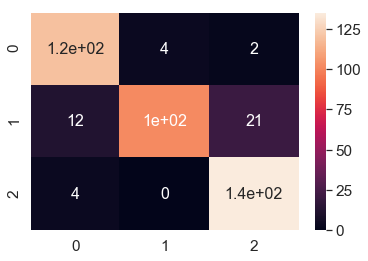

In [42]:
sns.set(font_scale=1.4) # for label size
sns.heatmap(cm_multi, annot=True, annot_kws={"size": 16})

In [44]:
cm_multi

array([[120,   4,   2],
       [ 12, 102,  21],
       [  4,   0, 135]], dtype=int64)

In [51]:
n11 = cm_multi[0,0]
n12 = cm_multi[0,1]
n13 = cm_multi[0,2] 
n21 = cm_multi[1,0]
n22 = cm_multi[1,1]
n23 = cm_multi[1,2]
n31 = cm_multi[2,0]
n32 = cm_multi[2,1]
n33 = cm_multi[2,2]

In [52]:
print(n11);print(n12);print(n13);print(n21);print(n22);print(n23);print(n31);print(n32);print(n33)

120
4
2
12
102
21
4
0
135


Specifity For Class 0:

In [53]:
Specifity_0 = (n22+n33)/(n21+n31+n22+n33)
print("Specifity of Class 0:",Specifity_0)

Specifity of Class 0: 0.9367588932806324


Sensivity For Class 0:

In [54]:
Sensivity_0 = n11/(n11+n12+n13)
print("Sensivity of Class 0:",Sensivity_0)

Sensivity of Class 0: 0.9523809523809523


Specifity For Class 1:

In [56]:
Specifity_1 = (n11+n33)/(n12+n32+n11+n33)
print("Specifity of Class 1:",Specifity_1)

Specifity of Class 1: 0.9845559845559846


Sensivity For Class 1:

In [57]:
Sensivity_1 = n22/(n21+n22+n23)
print("Sensivity of Class 1:",Sensivity_1)

Sensivity of Class 1: 0.7555555555555555


Specifity For Class 2:

In [59]:
Specifity_2 = (n11+n22)/(n13+n23+n11+n22)
print("Specifity of Class 2:",Specifity_2)

Specifity of Class 2: 0.9061224489795918


Sensivity For Class 1:

In [58]:
Sensivity_2 = n33/(n31+n32+n33)
print("Sensivity of Class 2:",Sensivity_2)

Sensivity of Class 2: 0.9712230215827338
